# K-means Clustering

# Airlines Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [2]:
airline=pd.read_excel('EastWestAirlines.xlsx', sheet_name = 'data')
airline

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [3]:
airline2=airline.drop(['ID#'],axis=1)
airline2

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1
3995,64385,0,1,1,1,981,5,0,0,1395,1
3996,73597,0,3,1,1,25447,8,0,0,1402,1
3997,54899,0,1,1,1,500,1,500,1,1401,0


# EDA

In [4]:
airline2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Balance            3999 non-null   int64
 1   Qual_miles         3999 non-null   int64
 2   cc1_miles          3999 non-null   int64
 3   cc2_miles          3999 non-null   int64
 4   cc3_miles          3999 non-null   int64
 5   Bonus_miles        3999 non-null   int64
 6   Bonus_trans        3999 non-null   int64
 7   Flight_miles_12mo  3999 non-null   int64
 8   Flight_trans_12    3999 non-null   int64
 9   Days_since_enroll  3999 non-null   int64
 10  Award?             3999 non-null   int64
dtypes: int64(11)
memory usage: 343.8 KB


In [5]:
airline2_norm=StandardScaler().fit_transform(airline2)

Use Elbow Graph to find optimum number of  clusters (K value) from K values range
The K-means algorithm aims to choose centroids that minimise the inertia, or within-cluster sum-of-squares criterion WCSS 
random state can be anything from 0 to 42, but the same number to be used everytime,so that the results don't change. 

In [8]:
wcss=[]
for i in range (1,11):
    kmeans=KMeans(n_clusters=i,random_state=2)    #sum of squares criterion
    kmeans.fit(airline2_norm)
    wcss.append(kmeans.inertia_)

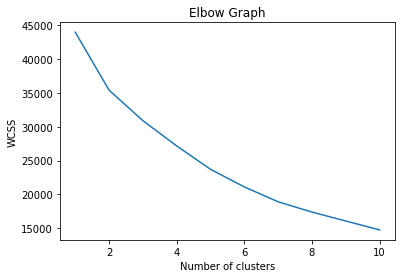

In [9]:
# Plot K values range vs WCSS to get Elbow graph for choosing K (no. of clusters)
plt.plot(range(1,11),wcss)
plt.title('Elbow Graph')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [16]:
#Build Cluster algorithm using K=4
clusters4=KMeans(4,random_state=30).fit(airline2_norm)

In [19]:
clusters4.labels_

array([2, 2, 2, ..., 0, 2, 2])

In [22]:
# Assigning clusters to the dataset
airline4=airline2.copy()
airline4['clusters4id']=clusters4.labels_
airline4

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clusters4id
0,28143,0,1,1,1,174,1,0,0,7000,0,2
1,19244,0,1,1,1,215,2,0,0,6968,0,2
2,41354,0,1,1,1,4123,4,0,0,7034,0,2
3,14776,0,1,1,1,500,1,0,0,6952,0,2
4,97752,0,4,1,1,43300,26,2077,4,6935,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1,2
3995,64385,0,1,1,1,981,5,0,0,1395,1,2
3996,73597,0,3,1,1,25447,8,0,0,1402,1,0
3997,54899,0,1,1,1,500,1,500,1,1401,0,2


In [23]:
#Build Cluster algorithm using K=5
clusters5=KMeans(5,random_state=30).fit(airline2_norm)

In [24]:
clusters5.labels_

array([2, 2, 2, ..., 1, 2, 2])

In [25]:
# Assigning clusters to the data set
airline5=airline2.copy()
airline5['clusters5id']=clusters5.labels_
airline5

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clusters5id
0,28143,0,1,1,1,174,1,0,0,7000,0,2
1,19244,0,1,1,1,215,2,0,0,6968,0,2
2,41354,0,1,1,1,4123,4,0,0,7034,0,2
3,14776,0,1,1,1,500,1,0,0,6952,0,2
4,97752,0,4,1,1,43300,26,2077,4,6935,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1,2
3995,64385,0,1,1,1,981,5,0,0,1395,1,2
3996,73597,0,3,1,1,25447,8,0,0,1402,1,1
3997,54899,0,1,1,1,500,1,500,1,1401,0,2
